In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#to see length of training dataset
len(x_train)

60000

In [5]:
##to see length of testing dataset
len(x_test)

10000

In [6]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

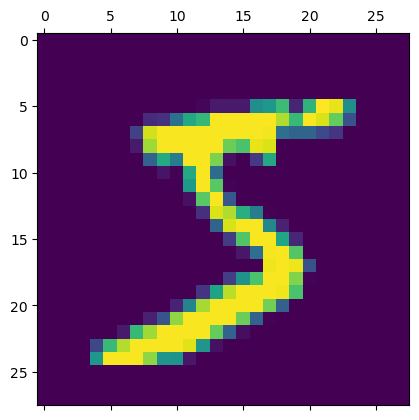

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6437 - accuracy: 0.8348 - val_loss: 0.3576 - val_accuracy: 0.9037
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3372 - accuracy: 0.9054 - val_loss: 0.2965 - val_accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2899 - accuracy: 0.9183 - val_loss: 0.2634 - val_accuracy: 0.9261
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2603 - accuracy: 0.9264 - val_loss: 0.2410 - val_accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2369 - accuracy: 0.9334 - val_loss: 0.2242 - val_accuracy: 0.9359
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2181 - accuracy: 0.9388 - val_loss: 0.2072 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2024 - accuracy: 0.9434 - val_loss: 0.1968 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1646 - accuracy: 0.9526
Loss=0.165
Accuracy=0.953


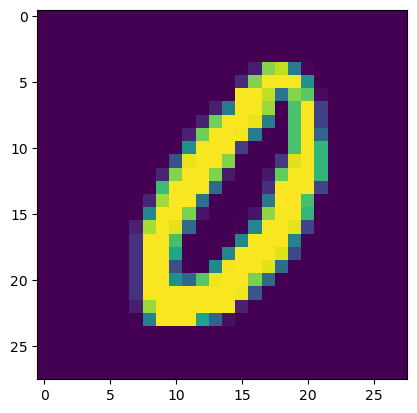

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [18]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 0


In [19]:
history.history??

In [20]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

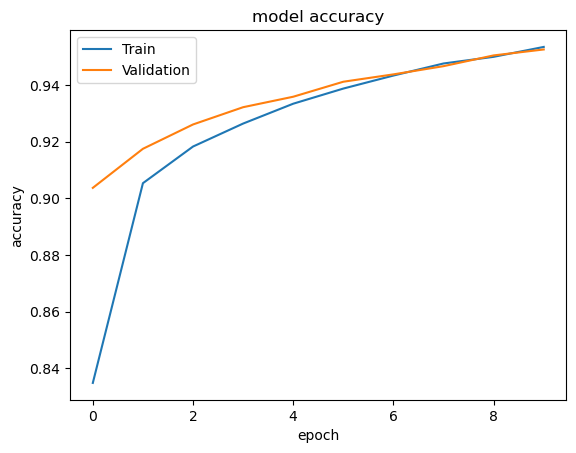

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

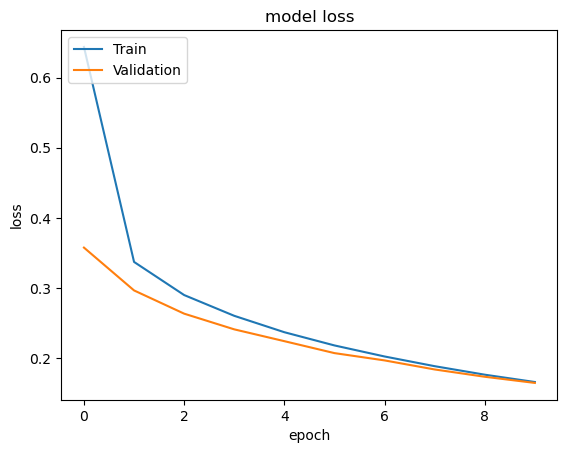

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

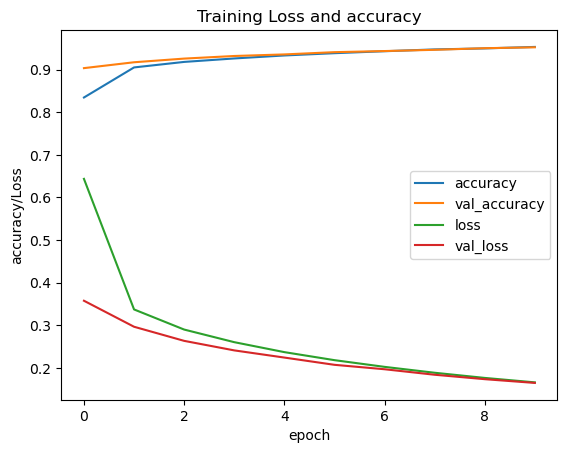

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [26]:
pwd

'C:\\Users\\abhis\\Downloads\\DL\\Ass2'

In [27]:
keras_model_path='C:\\Users\\abhis\\Downloads\\DL\\Ass2'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\abhis\Downloads\DL\Ass2\assets


INFO:tensorflow:Assets written to: C:\Users\abhis\Downloads\DL\Ass2\assets


In [28]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)